In [6]:
%load_ext cython

In [7]:
%%cython

import numpy as np
from mpire import WorkerPool

cdef float epsilon, delta, LB, UB, mu, sig
cdef short n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
pi= np.pi

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    d_n = delta/n**2 * 6/pi**2
    return sig * np.sqrt(2*np.log(3/d_n)/n) + 3*np.log(3/d_n)/n

def LEBR(symulation, p1, p2, delta = 0.05, epsilon = 0.01):
    LB = 0
    UB = 1
    t = 0
    X_t = []
    n = 1
    sumx=0
    sumx2=0
    while UB - LB > 2*epsilon:
        Xt = np.random.choice([1, 0],p=[0.01,0.99])
        # Xt= symulation(p1, p2)
        t+=1
        sumx += Xt
        sumx2 += Xt**2
        mu = sumx/(t)
        sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        d = UB - LB
        n+=1
    return mu

In [8]:
%%cython

import numpy as np
from mpire import WorkerPool
import scipy as sci



pool = WorkerPool(n_jobs=4)
cdef float epsilon, delta, LB, UB, mu, sig
cdef short n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
pi= np.pi

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    d_n = delta/n**2 * 6/pi**2
    return sig * np.sqrt(2*np.log(3/d_n)/n) + 3*np.log(3/d_n)/n

def LEBR_test(p, delta = 0.05, epsilon = 0.01):
    np.random.seed()
    LB = 0
    UB = 1
    t = 0
    n = 1
    sumx = 0
    sumx2 = 0
    while UB - LB > 2*epsilon:
        Xt = np.random.choice([1, 0],p=[p, 1-p])
        t+=1
        sumx += Xt
        sumx2 += Xt**2
        mu = sumx/(t)
        sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        n+=1
    return mu, n

# ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
# ps2 = np.arange(0, 0.5+0.05, 0.05)

# x1_LEBR = np.array([pool.map(LEBR_test, [p]*1000) for p in ps1])

# x2_LEBR = np.array([pool.map(LEBR_test, [p]*100) for p in ps2])

In [9]:
import numpy as np
np.save("x1_LEBR",x1_LEBR)
np.save("x2_LEBR", x2_LEBR)

In [8]:
symulation_p_x1_LEBR = x1_LEBR[:, :, 0]
symulation_n_x1_LEBR = x2_LEBR[:, :, 1]

## IEBLR

In [10]:
%%cython
import numpy as np
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 74540
def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/n) + 3*np.log(3*n_max/delta)/n

def ILEBR(symulation, p1, p2, delta = 0.05, epsilon = 0.01, n_max = n_max):
    LB = 0
    UB = 1
    t = 0
    sumx=0
    sumx2=0
    for n in range(1, n_max+1):
        Xt = np.random.choice([1, 0],p=[0.05, 0.95])
        # Xt= symulation(p1, p2)
        t+=1
        sumx += Xt
        sumx2 +=Xt**2
        mu = sumx/(t)
        sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
    return mu

In [11]:
%%cython
import numpy as np
from mpire import WorkerPool
import scipy as sci

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n, t, n_max
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 74540

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/n) + 3*np.log(3*n_max/delta)/n

def ILEBR_test(p, delta = 0.05, epsilon = 0.01, n_max = n_max):
    np.random.seed()
    LB = 0
    UB = 1
    t = 0
    sumx = 0
    sumx2 = 0
    for n in range(1, n_max+1):
        Xt = np.random.choice([1, 0],p=[p, 1-p])
        # Xt= symulation(p1, p2)
        t += 1
        sumx += Xt
        sumx2 += Xt**2
        mu = sumx/(t)
        sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
    return mu, n

# ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
# ps2 = np.arange(0, 0.5+0.05, 0.05)

# x1_ILEBR = np.array([pool.map(ILEBR_test, [p]*1000) for p in ps1])
# x2_ILEBR = np.array([pool.map(ILEBR_test, [p]*100) for p in ps2])

In [12]:
np.save("x1_ILEBR", x1_ILEBR)
np.save("x2_ILEBR", x2_ILEBR)

In [109]:
symulation_p_x1_ILEBR = x1_ILEBR[:, :, 0]
symulation_n_x1_ILEBR = x2_ILEBR[:, :, 1]

## ILEBR2

In [13]:
%%cython
import numpy as np
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 213

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/n**2) + 3*np.log(3*n_max/delta)/n**2

def ILEBR2(symulation, p1, p2, delta = 0.05, epsilon = 0.01, n_max = n_max):
    LB = 0
    UB = 1
    t = 0
    sumx=0
    sumx2=0
    for n in range(1, n_max+1):
        for i in range(2*n - 1):
            Xt = np.random.choice([1, 0],p=[0.5, 0.5])
            # Xt= symulation(p1, p2)
            t+=1
            sumx += Xt
            sumx2 += Xt**2
            mu = sumx/(t)
            sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
    return mu

In [5]:
%%cython
import numpy as np
from mpire import WorkerPool
import scipy as sci

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n, t, n_max
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 213

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/n**2) + 3*np.log(3*n_max/delta)/n**2
    
def ILEBR2_test(p, delta = 0.05, epsilon = 0.01, n_max = n_max):
    np.random.seed()
    LB = 0
    UB = 1
    t = 0
    sumx=0
    sumx2=0
    for n in range(1, n_max+1):
        for i in range(2*n - 1):
            Xt = np.random.choice([1, 0],p=[p, 1-p])
            # Xt= symulation(p1, p2)
            t+=1
            sumx += Xt
            sumx2 += Xt**2
            mu = sumx/(t)
            sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
    return mu, n**2

# ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
# x1_ILEBR2 = np.array([pool.map(ILEBR2_test, [p]*1000) for p in ps1])

# ps2 = np.arange(0, 0.5+0.05, 0.05)
# x2_ILEBR2 = np.array([pool.map(ILEBR2_test, [p]*100) for p in ps2])

In [ ]:
np.save("x1_IEBLR", x1_ILEBR2)
np.save("x2_IEBLR", x2_ILEBR2)

In [6]:
symulation_p_ILEBR2 = x1_ILEBR2[:, :, 0]
symulation_n_ILEBR2 = x2_ILEBR2[:, :, 1]

## ILEBR*

In [14]:
%%cython
import numpy as np
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 213

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/n**2) + 3*np.log(3*n_max/delta)/n**2

def ILEBR_star(symulation, p1, p2, delta = 0.05, epsilon = 0.01, n_max = n_max):
    LB = 0
    UB = 1
    t = 0
    sumx=0
    sumx2=0
    for n in range(1, n_max+1):
        for i in range(2*n - 1):
            Xt = np.random.choice([1, 0],p=[0.1, 0.9])
            # Xt= symulation(p1, p2)
            t+=1
            sumx += Xt
            sumx2 += Xt**2
            mu = sumx/(t)
            sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
        elif UB < 0.5:
            break
        elif LB > 0.5:
            break
    if LB > 0.5:
        return 1
    elif UB < 0.5:
        return 0
    elif mu > 0.5:
        return 1
    else:
        return 0


In [15]:
%%cython
import numpy as np
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 213

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/n**2) + 3*np.log(3*n_max/delta)/n**2

def ILEBR_star_test(p, delta = 0.05, epsilon = 0.01, n_max = n_max):
    np.random.seed()
    LB = 0
    UB = 1
    t = 0
    sumx=0
    sumx2=0
    for n in range(1, n_max+1):
        for i in range(2*n - 1):
            Xt = np.random.choice([1, 0],p=[p, 1-p])
            # Xt= symulation(p1, p2)
            t+=1
            sumx += Xt
            sumx2 += Xt**2
            mu = sumx/(t)
            sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
        elif UB < 0.5:
            break
        elif LB > 0.5:
            break
    if LB > 0.5:
        return 1, n**2
    elif UB < 0.5:
        return 0, n**2
    elif mu > 0.5:
        return 1, n**2
    else:
        return 0, n**2


# ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
# ps1 = np.linspace(0.495, 0.5+0.0005,3)

# x1_ILEBR_star = np.array([pool.map(ILEBR_star_test, [p]*1000) for p in ps1])

# ps2_star = np.arange(0, 0.5+0.01, 0.01)
# x2_ILEBR_star = np.array([pool.map(ILEBR_star_test, [p]*100) for p in ps2_star])


In [ ]:
np.save("x1_IEBLR_star", x1_ILEBR_star)
np.save("x2_IEBLR_star", x2_ILEBR_star)

In [ ]:
symulation_p_ILEBR_star = x1_ILEBR_star[:, :, 0]
symulation_n_ILEBR_star = x2_ILEBR_star[:, :, 1]

## ILEBR* 2

In [17]:
%%cython
import numpy as np
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 205
t0=8-1
def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/(n+t0)**2) + 3*np.log(3*n_max/delta)/(n+t0)**2

def ILEBR_star2(p, delta = 0.05, epsilon = 0.01, n_max = n_max):
    LB = 0
    UB = 1
    t = t0
    # XT0 = [symulation(p1, p2) for i in range(t0)]
    XT0 = np.random.choice([1, 0],p=[p, 1-p], size=t**2)
    sumx= sum(XT0)
    sumx2= sum(XT0**2)
    for n in range(1, n_max+1):
        for i in range(2*(n+t0) - 1):
            Xt = np.random.choice([1, 0],p=[p, 1-p])
            # Xt= symulation(p1, p2)
            t+=1
            sumx += Xt
            sumx2 += Xt**2
            mu = sumx/(t)
            sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
        elif UB < 0.5:
            break
        elif LB > 0.5:
            break
    if LB > 0.5:
        return 1
    elif UB < 0.5:
        return 0
    elif mu > 0.5:
        return 1
    else:
        return 0


In [18]:
%%cython
import numpy as np
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 205
t0=8-1
def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/(n+t0)**2) + 3*np.log(3*n_max/delta)/(n+t0)**2

def ILEBR_star2_test(p, delta = 0.05, epsilon = 0.01, n_max = n_max):
    np.random.seed()
    LB = 0
    UB = 1
    t = t0
    # XT0 = [symulation(p1, p2) for i in range(t0)]
    XT0 = np.random.choice([1, 0],p=[p, 1-p], size=t**2)
    sumx= sum(XT0)
    sumx2= sum(XT0**2)
    for n in range(1, n_max+1):
        for i in range(2*(n+t0) - 1):
            Xt = np.random.choice([1, 0],p=[p, 1-p])
            # Xt= symulation(p1, p2)
            t+=1
            sumx += Xt
            sumx2 += Xt**2
            mu = sumx/(t)
            sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
        elif UB < 0.5:
            break
        elif LB > 0.5:
            break
    if LB > 0.5:
        return 1
    elif UB < 0.5:
        return 0
    elif mu > 0.5:
        return 1
    else:
        return 0



# ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
# x1_ILEBR_star2 = np.array([pool.map(ILEBR_star2_test, [p]*1000) for p in ps1])

# ps2_star = np.arange(0, 0.5+0.01, 0.01)
# x2_ILEBR_star2 = np.array([pool.map(ILEBR_star2_test, [p]*100) for p in ps2_star])


In [36]:
np.save("x1_ILEBR_star2", x1_ILEBR_star2)
np.save("x2_ILEBR_star2", x2_ILEBR_star2)

(0, 64)

In [ ]:
symulation_p_ILEBR2_star = x1_ILEBR_star2[:, :, 0]
symulation_n_ILEBR2_star = x2_ILEBR_star2[:, :, 1]

# Plots

## Power

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

LEBR_df = pd.DataFrame((symulation_p_x1_LEBR>0.5).T.astype(int))
LEBR_df.columns = ps1
# LEBR_df = pd.melt(LEBR_df)
LEBR_df = LEBR_df.assign(type = "LEBR")

ILEBR_df = pd.DataFrame((symulation_p_x1_ILEBR>0.5).T.astype(int))
ILEBR_df.columns = ps1
ILEBR_df = ILEBR_df.assign(type = "ILEBR")

df = pd.concat([LEBR_df, ILEBR_df])
df = pd.melt(df, id_vars="type")
sns.lineplot(data=df, x="variable", y="value", hue="type", style="type", markers=True,
            dashes=False, palette="dark:b")
# # sns.lineplot(data=LEBR_df, x="variable", y="value", marker="o")
xs = np.linspace(min(ps1),max(ps1),10)
plt.xticks(xs,np.round(xs, 3))
plt.ylabel("power")
plt.xlabel("$\mu$")
plt.show()

# from mpire import WorkerPool

# pool = WorkerPool(n_jobs=5)

# sns.set()

# ps = np.arange(0.48, 0.5, 0.001)
# print(ps)
# x = np.array([pool.map(EBLR_test, [p]*100) for p in ps])


## Need t

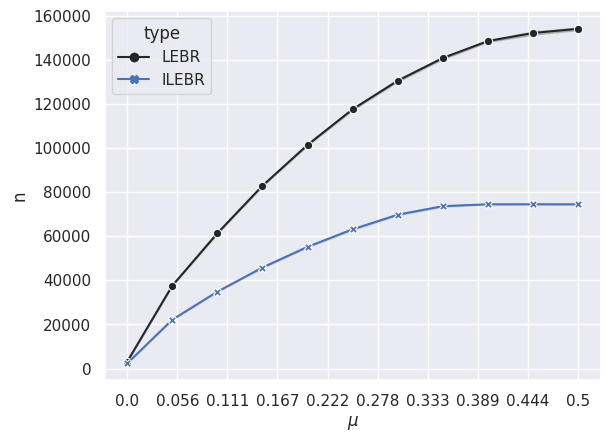

In [118]:
sns.set(style="darkgrid")

LEBR_n_df = pd.DataFrame(symulation_n_x1_LEBR.T)
LEBR_n_df.columns = ps2
LEBR_n_df = LEBR_n_df.assign(type = "LEBR")

ILEBR_n_df = pd.DataFrame(symulation_n_x1_ILEBR.T)
ILEBR_n_df.columns = ps2
ILEBR_n_df = ILEBR_n_df.assign(type = "ILEBR")

ILEBR2_df_star = pd.DataFrame(symulation_p_ILEBR2_star).T.astype(int))
ILEBR2_df_star.columns = ps1
ILEBR2_df_star = pd.melt(ILEBR2_df_star)

df_n = pd.concat([LEBR_n_df, ILEBR_n_df])
df_n = pd.melt(df_n, id_vars="type")
sns.lineplot(data=df_n, x="variable", y="value", hue="type", style="type", markers=True,
            dashes=False, palette="dark:b")
xs = np.linspace(min(ps2),max(ps2),10)
plt.xticks(xs,np.round(xs, 3))
plt.ylabel("n")
plt.xlabel("$\mu$")

plt.show()